In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

color = sns.color_palette()

In [2]:
data = pd.read_csv('./data/data.csv')
log = pd.read_csv('./data/log.csv')

In [3]:
train_df = data[data['FLAG'] != -1]

In [4]:
binary_cat = ['V2', 'V4', 'V5']

In [5]:
train_df[binary_cat] = train_df[binary_cat].astype('str')

/Users/Liulu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
train_df[binary_cat].describe()

,V2,V4,V5
count,80000,80000,80000
unique,2,2,2
top,0,1,0
freq,43949,73857,54493


In [7]:
train_df[["V4", "FLAG"]].groupby(['V4'], as_index=False).mean().sort_values(by='FLAG', ascending=False)

,V4,FLAG
0,0,0.091975
1,1,0.035352


In [8]:
train_df[["V2", "FLAG"]].groupby(['V2'], as_index=False).mean().sort_values(by='FLAG', ascending=False)

,V2,FLAG
1,1,0.046850
0,0,0.033835


In [9]:
train_df[["V5", "FLAG"]].groupby(['V5'], as_index=False).mean().sort_values(by='FLAG', ascending=False)

,V5,FLAG
0,0,0.046006
1,1,0.026228


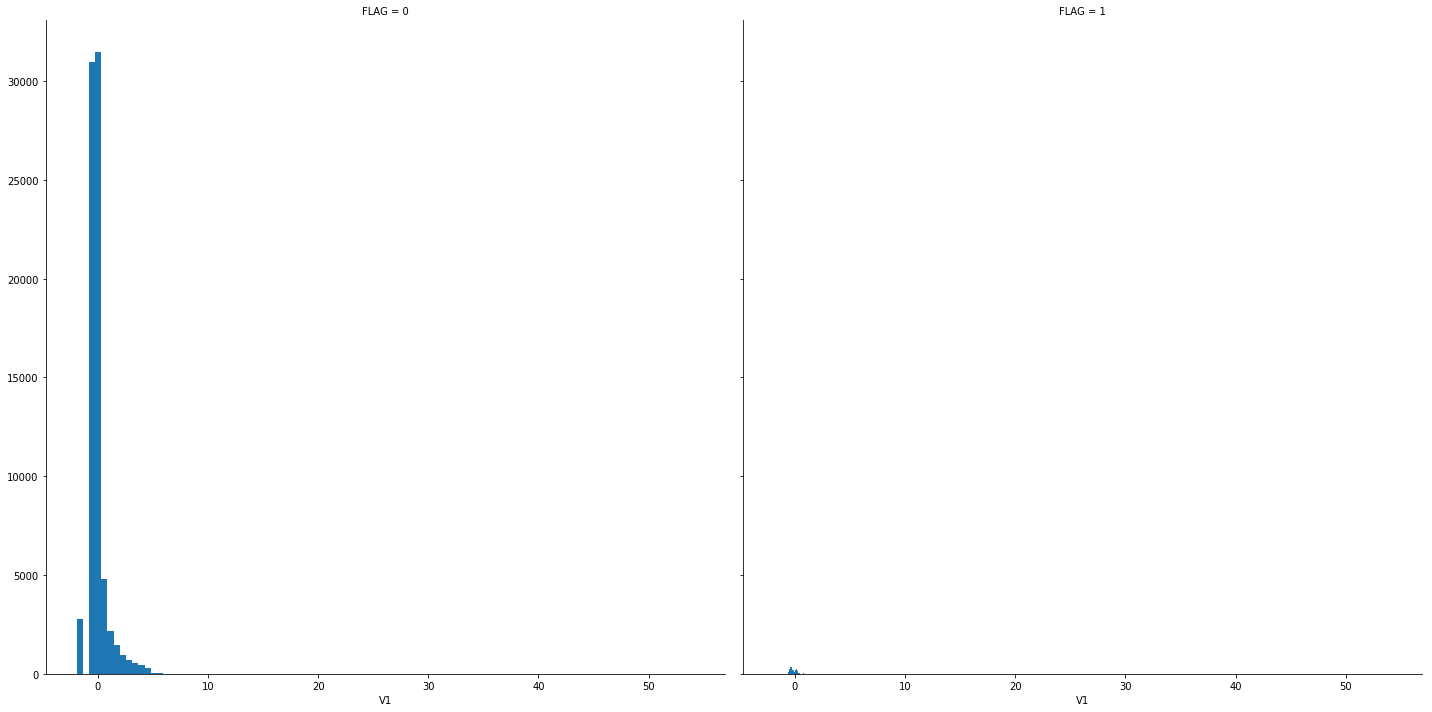

In [10]:
plt.figure(figsize=(80, 4))
g = sns.FacetGrid(train_df, col='FLAG', size=10)
g.map(plt.hist, 'V1', bins=100)
plt.show()

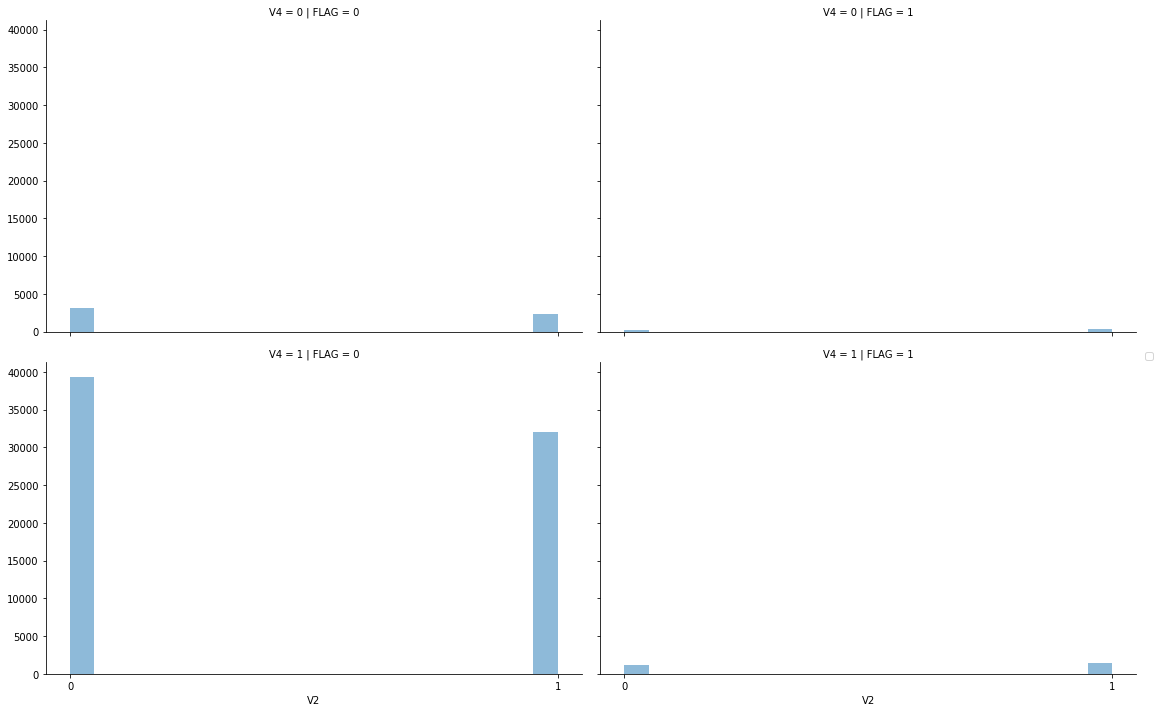

In [11]:
grid = sns.FacetGrid(train_df, col='FLAG', row='V4', size=5, aspect=1.6)
grid.map(plt.hist, 'V2', alpha=.5, bins=20)
grid.add_legend();

/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


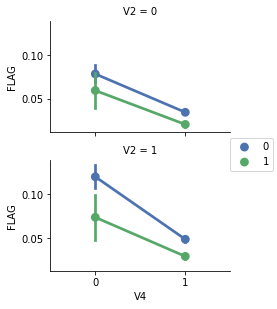

In [12]:
grid = sns.FacetGrid(train_df, row='V2', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'V4', 'FLAG', 'V5', palette='deep')
grid.add_legend()

/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


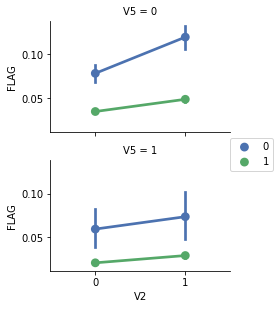

In [13]:
grid = sns.FacetGrid(train_df, row='V5', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'V2', 'FLAG', 'V4', palette='deep')
grid.add_legend()

/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Liulu/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


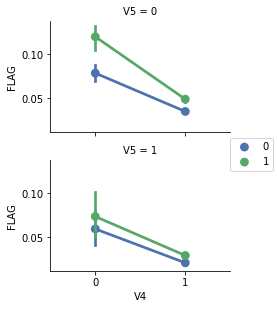

In [14]:
grid = sns.FacetGrid(train_df, row='V5', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'V4', 'FLAG', 'V2', palette='deep')
grid.add_legend()

In [15]:
 #### V4 V5可能会有联系 V4=0, V5=0时，V2等于1的比例较高，其余差不多，也就是说V2主要高在这里

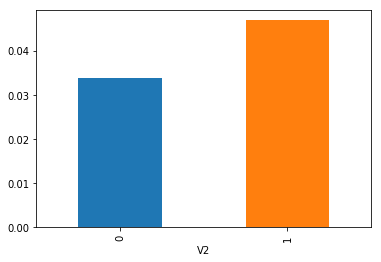

In [16]:
train_df.groupby('V2')['FLAG'].mean().plot(kind='bar')

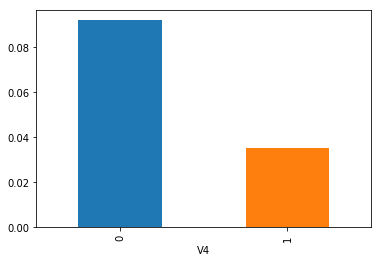

In [17]:
train_df.groupby('V4')['FLAG'].mean().plot(kind='bar')

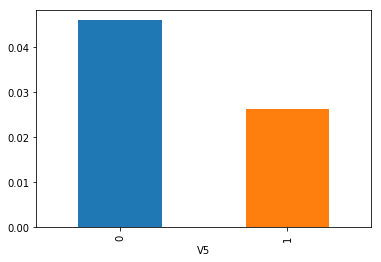

In [18]:
train_df.groupby('V5')['FLAG'].mean().plot(kind='bar')

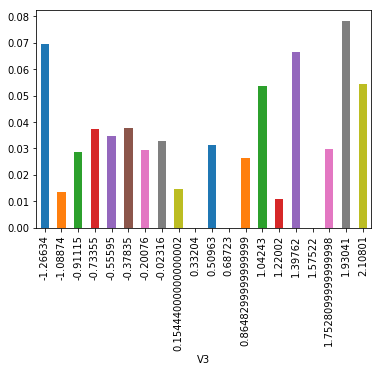

In [19]:
train_df.groupby('V3')['FLAG'].mean().plot(kind='bar')

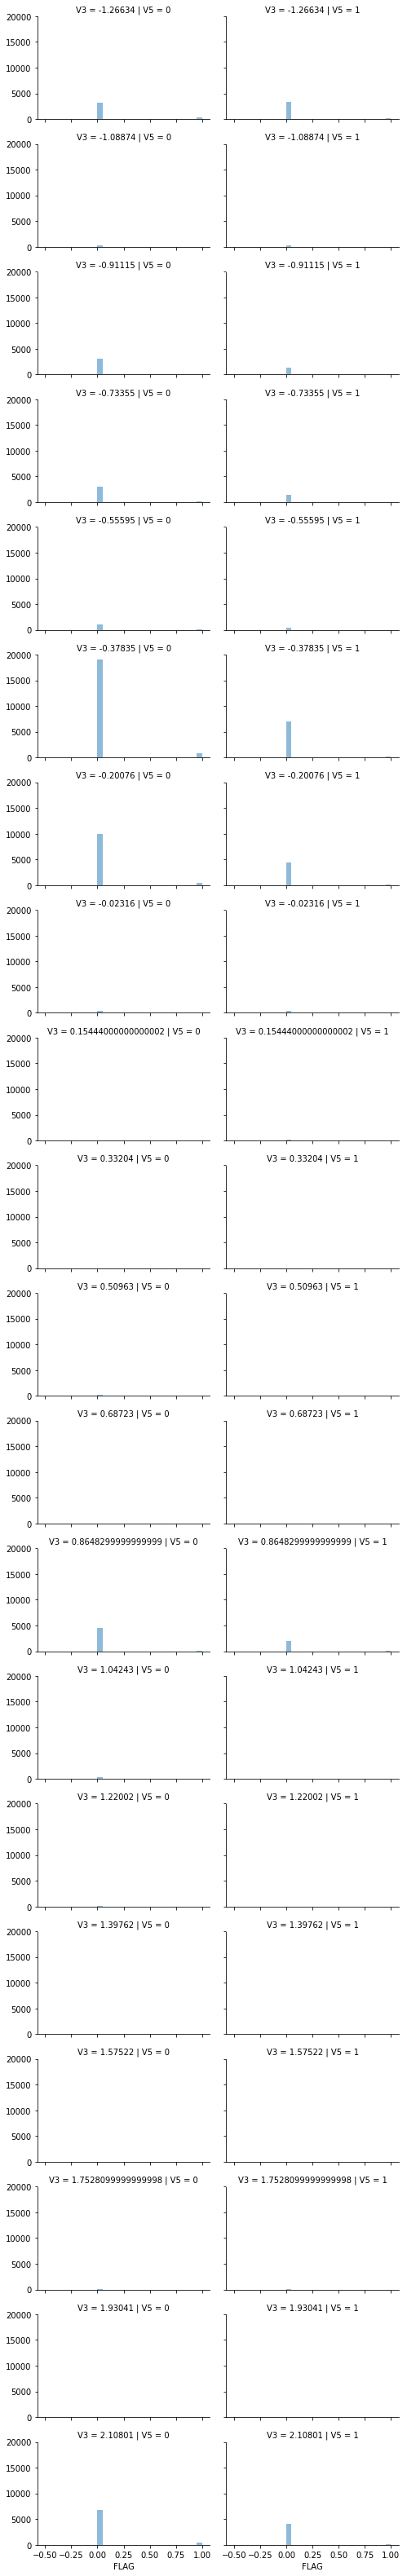

In [20]:
grid = sns.FacetGrid(train_df, row='V3', col='V5', size=2.2, aspect=1.6)
grid.map(plt.hist, 'FLAG', alpha=.5, bins=20)

In [21]:
train_df['V1'].value_counts()

-0.36853     3243
-0.44638     3097
-1.92554     2952
-0.47233     2921
-0.31663     2755
-0.49828     2700
-0.42043     2659
-0.29068     2626
-0.39448     2422
-0.34258     2357
 0.09857     2251
-0.00523     2153
 0.02072     2153
 0.07262     2117
-0.55018     2091
 0.04667     2061
-0.03118     1987
 0.15047     1966
-0.10903     1919
-0.57613     1910
-0.26473     1832
-0.52423     1747
 0.12452     1678
 0.17642     1586
-0.16093     1527
 0.20237     1491
-0.08308     1454
-0.18688     1452
-0.21283     1225
-0.23878     1183
             ... 
 15.51296       1
 21.01439       1
 8.24692        1
 10.97168       1
 10.79003       1
 7.33866        1
 8.94757        1
 8.81782        1
 11.04953       1
 10.76408       1
 11.41283       1
 12.34704       1
 5.05505        1
 6.09306        1
 13.41100       1
 10.11533       1
 8.29882        1
 8.89567        1
 10.84193       1
 11.46473       1
 5.85950        1
 20.62513       1
 9.90773        1
 6.58611        1
 19.76878 

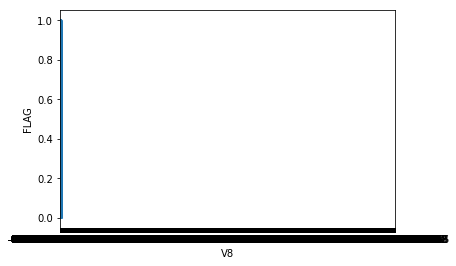

In [22]:
train_df.groupby('V8')['FLAG'].mean().plot()
sns.pointplot(x=train_df["V8"], y=train_df.groupby('V8')['FLAG'].mean(),
              data=train_df, join=True)

In [23]:
train_df[['V1', 'FLAG']].corr()

,V1,FLAG
V1,1.000000,-0.038479
FLAG,-0.038479,1.000000


In [24]:
train_df[['V14', 'FLAG']].corr()

,V14,FLAG
V14,1.00000,0.00126
FLAG,0.00126,1.00000


In [25]:
train_df[['V15', 'FLAG']].corr()

,V15,FLAG
V15,1.000000,0.055679
FLAG,0.055679,1.000000


In [26]:
train_df[['V18', 'FLAG']].corr()

,V18,FLAG
V18,1.000000,0.042427
FLAG,0.042427,1.000000


In [27]:
train_df[['V19', 'FLAG']].corr()

,V19,FLAG
V19,1.00000,0.03544
FLAG,0.03544,1.00000


In [28]:
train_df[['V20', 'FLAG']].corr()

,V20,FLAG
V20,1.000000,-0.041894
FLAG,-0.041894,1.000000


In [29]:
train_df[['V21', 'FLAG']].corr()

,V21,FLAG
V21,1.000000,0.001485
FLAG,0.001485,1.000000


In [30]:
train_df[['V24', 'FLAG']].corr()

,V24,FLAG
V24,1.000000,-0.027303
FLAG,-0.027303,1.000000


In [31]:
train_df[['V25', 'FLAG']].corr()

,V25,FLAG
V25,1.000000,0.014061
FLAG,0.014061,1.000000


In [32]:
train_df['V1'].describe(percentiles=[.61, .62, .63, .64, .65, .66, .80, .90, .99])

count    80000.000000
mean        -0.001843
std          0.971491
min         -1.925540
50%         -0.160930
61%         -0.005230
62%         -0.005230
63%          0.020720
64%          0.020720
65%          0.020720
66%          0.046670
80%          0.176420
90%          0.721380
99%          3.861340
max         54.126760
Name: V1, dtype: float64

In [33]:
train_df['V1_BAND'] = pd.qcut(train_df['V1'], 5)
train_df[['V1_BAND', 'FLAG']].groupby(['V1_BAND'], as_index=False).mean().sort_values(by='V1_BAND', ascending=True)

/Users/Liulu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,V1_BAND,FLAG
0,"(-1.9269999999999998, -0.446]",0.046159
1,"(-0.446, -0.291]",0.041651
2,"(-0.291, -0.0312]",0.038980
3,"(-0.0312, 0.176]",0.045161
4,"(0.176, 54.127]",0.025753


In [34]:
train_df[['V3', 'FLAG']].groupby(['V3'], as_index=False).mean().sort_values(by='V3', ascending=True)

,V3,FLAG
0,-1.26634,0.069437
1,-1.08874,0.013359
2,-0.91115,0.028694
3,-0.73355,0.037500
4,-0.55595,0.034741
5,-0.37835,0.037774
6,-0.20076,0.029483
7,-0.02316,0.032995
8,0.15444,0.014706
9,0.33204,0.000000


In [35]:
train_df['V8_BAND'] = pd.qcut(train_df['V3'], 5, duplicates='drop')
train_df[['V8_BAND', 'FLAG']].groupby(['V8_BAND'], as_index=False).mean().sort_values(by='V8_BAND', ascending=True)

/Users/Liulu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,V8_BAND,FLAG
0,"(-1.267, -0.734]",0.047950
1,"(-0.734, -0.378]",0.037618
2,"(-0.378, -0.201]",0.029483
3,"(-0.201, 0.865]",0.026934
4,"(0.865, 2.108]",0.054014


In [36]:
for col in data.columns:
    print(col + ":" + str(len(train_df[col].value_counts())))

V1:335
V2:2
V3:20
V4:2
V5:2
V6:60
V7:77
V8:10255
V9:403
V10:412
V11:36182
V12:209
V13:343
V14:3697
V15:29290
V16:28
V17:77
V18:47891
V19:35751
V20:45430
V21:13957
V22:35
V23:5117
V24:32899
V25:43616
V26:47
V27:13383
V28:46680
V29:14293
V30:68
USRID:80000
FLAG:2


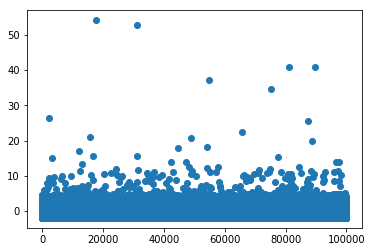

In [37]:
fig, ax = plt.subplots()
plt.scatter(data['USRID'], data['V1'])
plt.show()

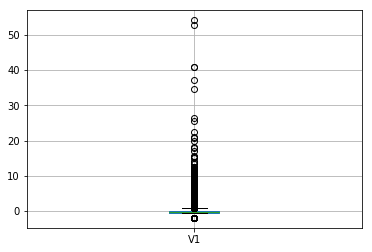

In [38]:
pd.DataFrame(data['V1']).boxplot()

In [39]:
data['V1'].value_counts()

-0.36853     4044
-0.44638     3825
-1.92554     3671
-0.47233     3641
-0.31663     3443
-0.49828     3365
-0.29068     3342
-0.42043     3324
-0.39448     3086
-0.34258     2954
 0.09857     2793
-0.00523     2718
 0.02072     2667
 0.07262     2640
-0.55018     2560
 0.04667     2547
-0.03118     2497
 0.15047     2465
-0.57613     2378
-0.10903     2377
-0.26473     2293
-0.52423     2218
 0.12452     2115
 0.17642     2014
-0.16093     1896
 0.20237     1878
-0.08308     1816
-0.18688     1794
-0.21283     1549
-0.23878     1507
             ... 
 11.04953       1
 8.81782        1
 8.94757        1
 7.33866        1
 40.97004       1
 26.36011       1
 10.24508       1
 10.79003       1
 10.97168       1
 8.24692        1
 11.59449       1
 8.29882        1
 10.99763       1
 8.89567        1
 9.57037        1
 10.71218       1
 54.12676       1
 11.85399       1
 6.53421        1
 19.76878       1
 6.58611        1
 9.90773        1
 16.94021       1
 18.08202       1
 20.62513 

In [40]:
data['V1'].describe()

count    100000.000000
mean         -0.000002
std           1.000005
min          -1.925540
25%          -0.394480
50%          -0.160930
75%           0.124520
max          54.126760
Name: V1, dtype: float64

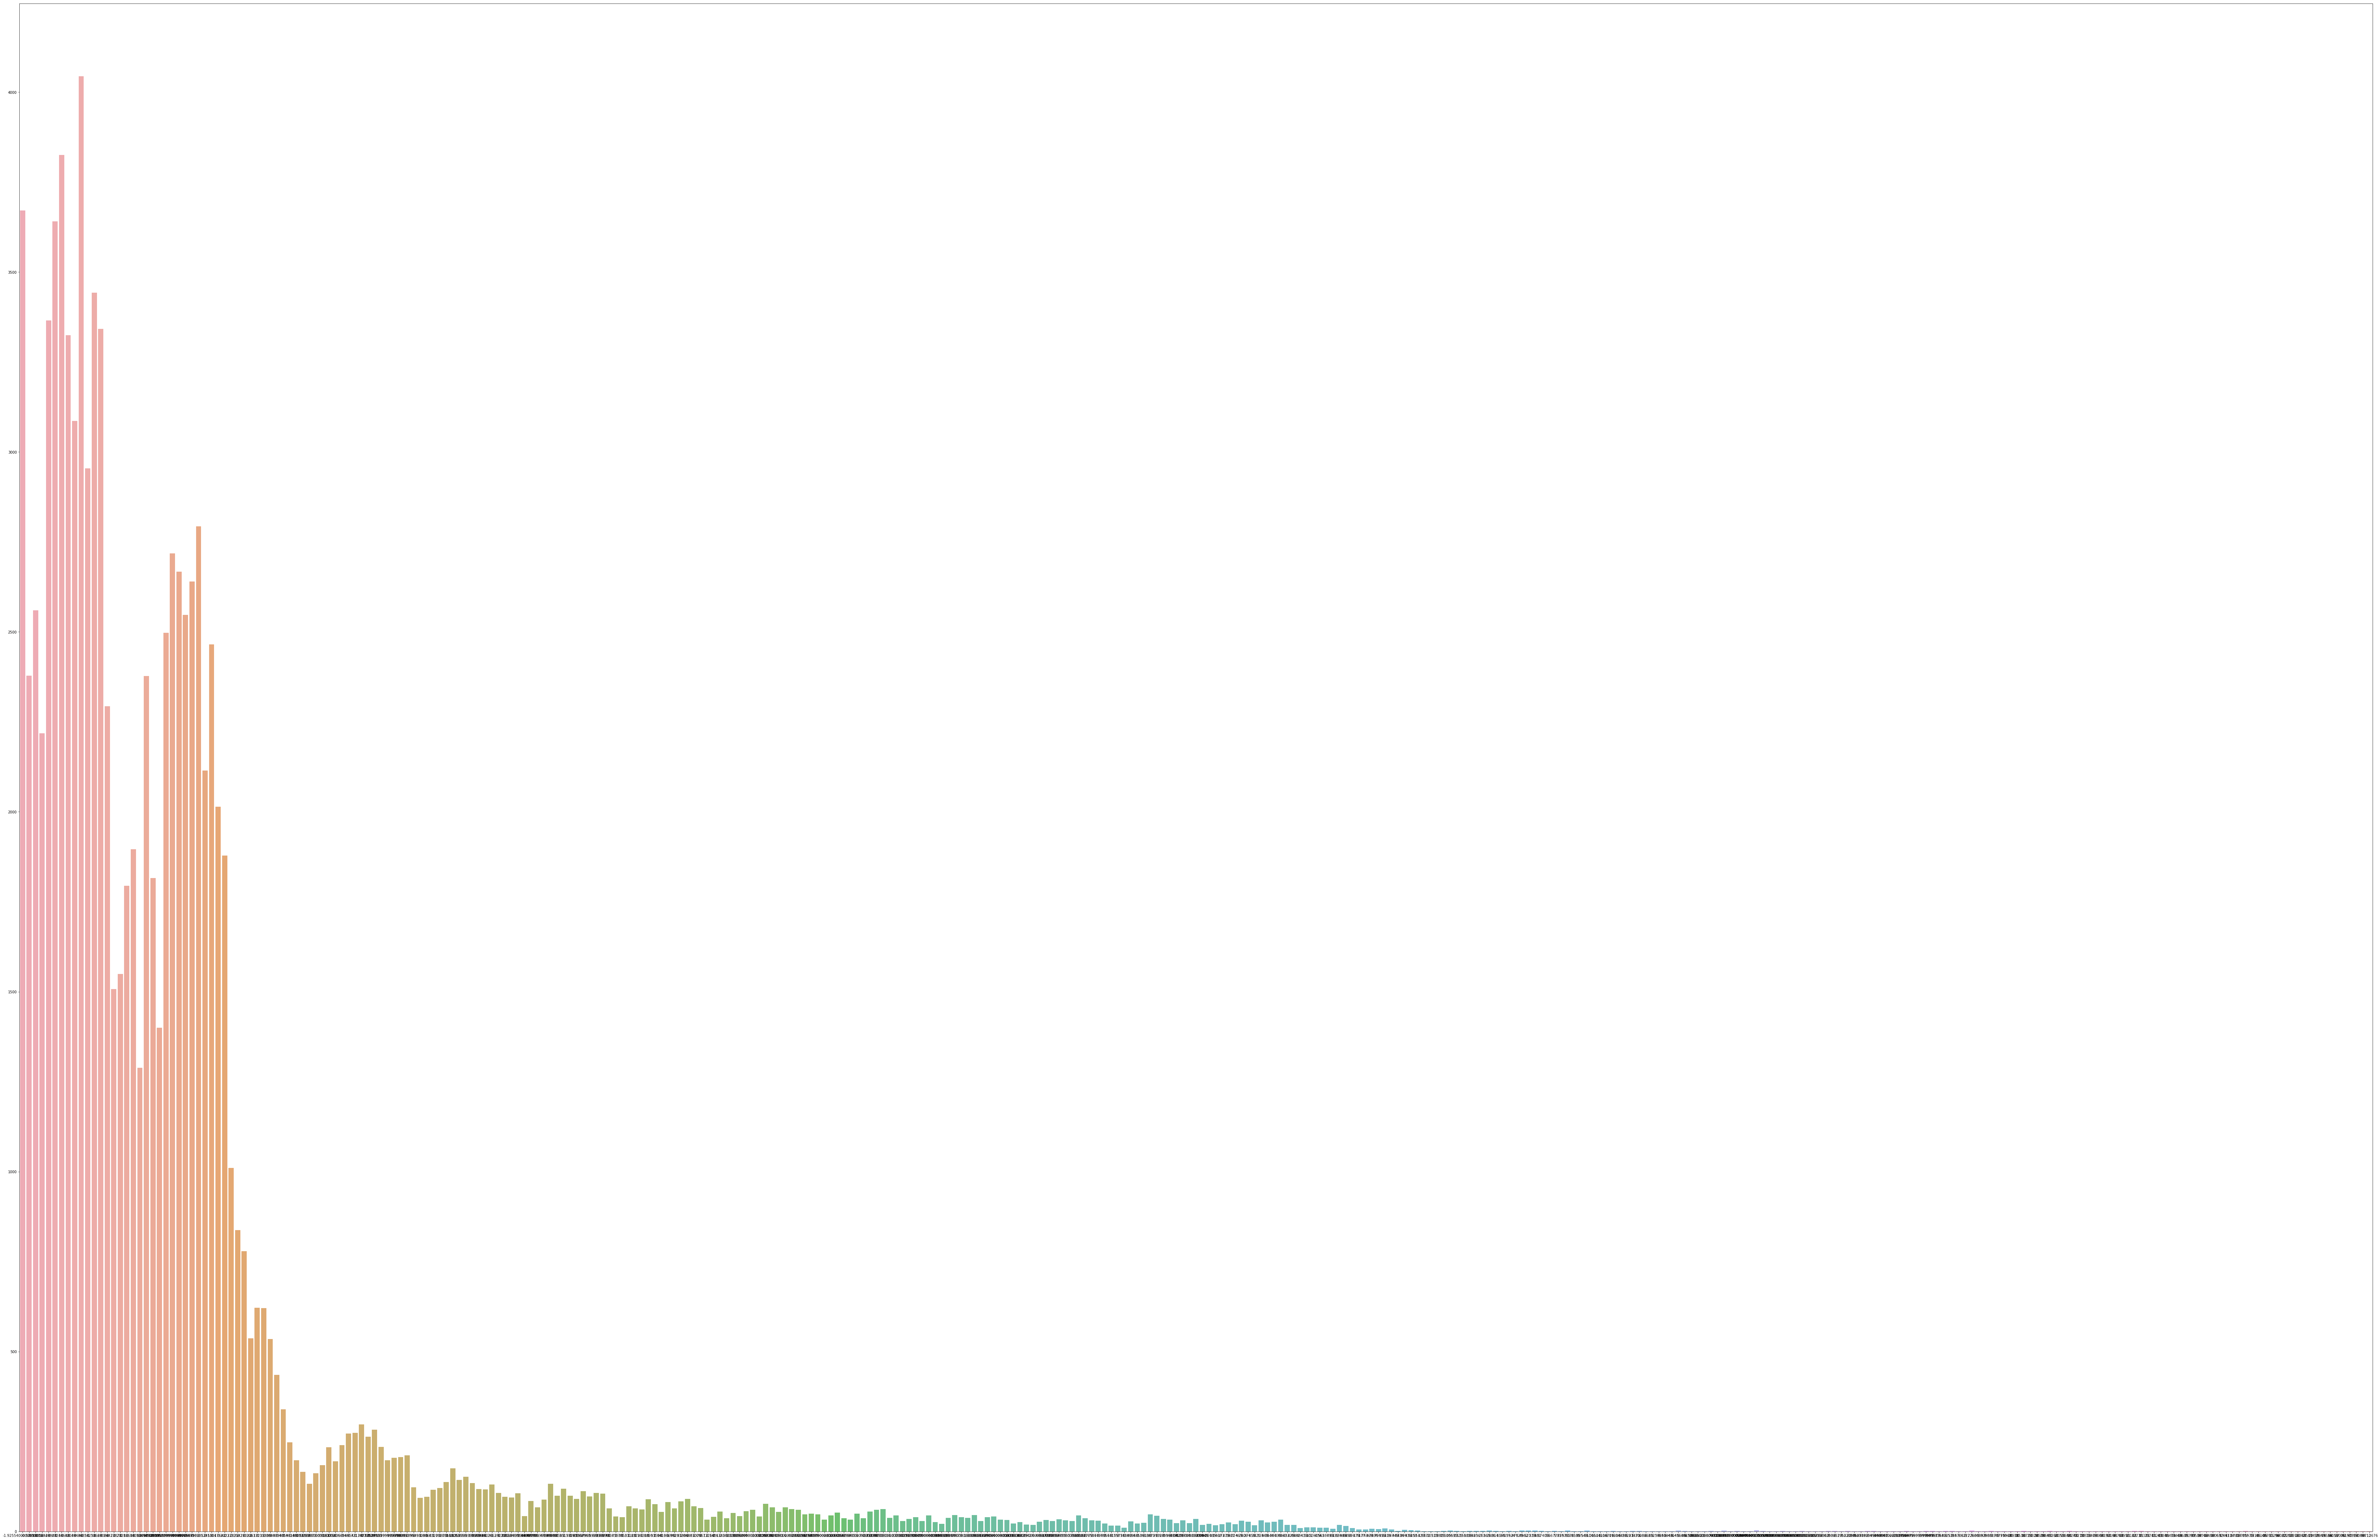

In [41]:
v1_cnt = data['V1'].value_counts()

plt.figure(figsize=(120, 80))
sns.barplot(v1_cnt.index, v1_cnt.values, alpha=0.8)
plt.show()

### target变量分布

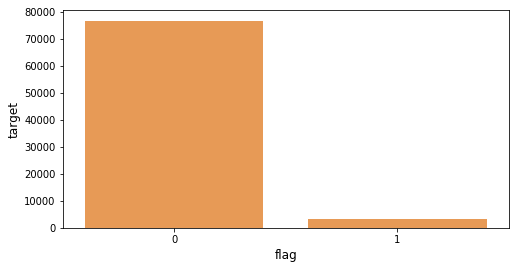

In [42]:
data_tar = data[data['FLAG'] != -1]
data_tar = data_tar['FLAG'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(data_tar.index, data_tar.values, alpha=0.8, color=color[1])
plt.ylabel('target', fontsize=12)
plt.xlabel('flag', fontsize=12)
plt.show()

In [43]:
data_tar / data_tar.sum()

0    0.9603
1    0.0397
Name: FLAG, dtype: float64

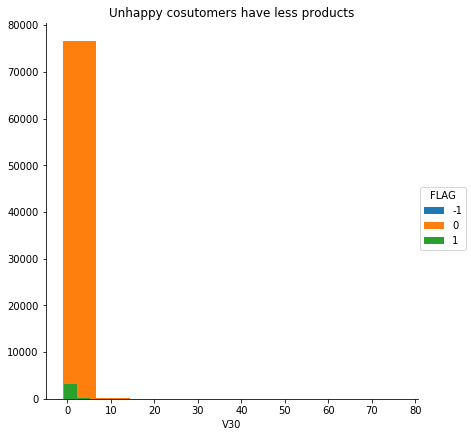

In [44]:
sns.FacetGrid(data, hue="FLAG", size=6) \
   .map(plt.hist, "V30") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

In [55]:
data['V7'].value_counts()

-0.29641     71028
 0.03980     12508
 0.37601      6536
 0.71221      3097
 1.04842      1996
 1.38463      1164
 1.72084       872
 2.05704       543
 2.39325       418
 2.72946       309
 3.06566       240
 3.40187       186
 3.73808       152
 4.07428       125
 4.41049       105
-0.63261        83
 4.74670        72
 5.08291        63
 5.41911        61
 6.09153        43
 6.42773        41
 5.75532        40
 7.43635        31
 7.10015        25
 6.76394        22
 7.77256        20
-0.96882        20
 9.11739        18
 8.44498        15
 8.78118        14
             ...  
 11.13463        2
 13.15187        2
 17.52256        2
-1.64123         2
 15.16911        2
 16.85015        2
 12.47946        1
 21.22084        1
 20.54843        1
 26.60015        1
 19.53981        1
 15.84153        1
-81.65850        1
 24.58291        1
 13.48808        1
 19.20360        1
 48.45361        1
 14.83291        1
 37.02257        1
 26.26395        1
 20.88463        1
 31.64326   

In [45]:
data['V8'].value_counts()

-0.18761    70999
-0.18552      323
 0.04461      174
-0.07150      162
-0.18343      149
-0.17600      147
 0.27684      136
-0.11795      123
-0.16439      121
-0.14117      108
 0.50907      103
 0.97352      100
-0.16718       93
-0.14395       81
 2.13466       80
-0.16578       79
 0.74129       79
-0.18529       75
-0.14674       74
-0.14442       71
-0.16671       67
-0.18134       67
-0.15278       66
-0.14813       66
-0.16602       64
-0.04828       63
-0.14581       63
 0.16073       59
-0.15092       54
-0.14628       53
            ...  
-0.10329        1
 0.04567        1
-0.13707        1
 0.34660        1
-0.09119        1
-0.09564        1
 0.30889        1
-0.00510        1
 0.04483        1
-0.03572        1
 0.35696        1
 2.44747        1
 0.55224        1
-0.18713        1
 2.07799        1
-0.12005        1
 0.10680        1
-0.02045        1
 0.27057        1
-0.00593        1
 0.41856        1
 0.30146        1
 0.13382        1
 0.94983        1
 1.13159  

In [46]:
data['V8'].describe()

count    100000.000000
mean          0.000002
std           1.000005
min         -10.745770
25%          -0.187610
50%          -0.187610
75%          -0.161370
max          66.949190
Name: V8, dtype: float64

In [47]:
data['V8'].quantile(0.99)

3.7566580999999957

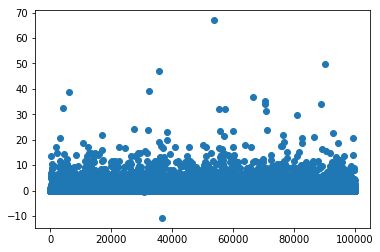

In [48]:
fig, ax = plt.subplots()
plt.scatter(data['USRID'], data['V8'])
plt.show()

In [49]:
def process_v8(x):
    if x > 25 or x < -8:
        x = None
    return x

data['V8'] = data['V8'].apply(lambda x: process_v8(x))

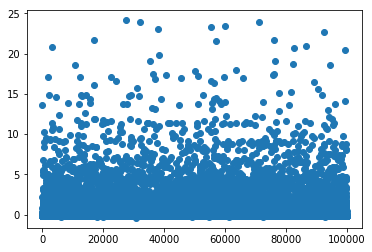

In [50]:
fig, ax = plt.subplots()
plt.scatter(data['USRID'], data['V8'])
plt.show()

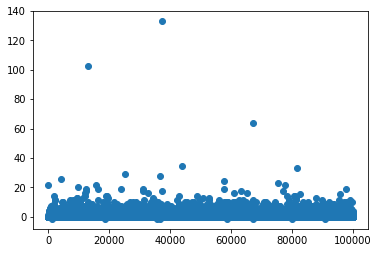

In [51]:
fig, ax = plt.subplots()
plt.scatter(data['USRID'], data['V16'])
plt.show()

In [52]:
data['V9'].quantile(0.99)

4.19195

In [53]:
data['V15'].mean()

2.50600002149618e-07